## Import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report

### Reading Data

In [2]:
data = 'data/south_german_credit_data_preprocessed.csv'
df = pd.read_csv(data)
df.head()

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
0,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
1,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   checking account                   1001 non-null   object
 1   duration in month                  1001 non-null   object
 2   credit history                     1001 non-null   object
 3   credit purpose                     1001 non-null   object
 4   credit amount                      1001 non-null   object
 5   savings account                    1001 non-null   object
 6   employment since..                 1001 non-null   object
 7   installment rate                   1001 non-null   object
 8   status : sex                       1001 non-null   object
 9   other debtors / guarantors         1001 non-null   object
 10  residence since                    1001 non-null   object
 11  property                           1001 non-null   object
 12  relati

In [4]:
df.describe()

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
count,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,...,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001
unique,5,34,6,11,924,6,6,5,5,4,...,5,54,4,4,5,5,3,3,3,3
top,4,24,2,3,1393,1,3,4,3,1,...,3,27,3,2,1,3,2,1,2,1
freq,394,184,530,280,3,603,339,476,548,907,...,332,50,814,714,633,630,845,596,963,700


In [5]:
df.drop(index=0, axis=0, inplace=True)
df = df.reset_index(drop=True)
df.head(2)

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1


In [6]:
# 0: "bad"
# 1: "good"
df['goodness'].value_counts()

1    700
0    300
Name: goodness, dtype: int64

## Spliting Data 

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42,
                                                    stratify=y)

# Models

### Random Forest

In [28]:
rfc = RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_depth=2,
                             max_features='sqrt',
                             random_state=0)
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
rfc.score(X_test, y_test)

0.7066666666666667

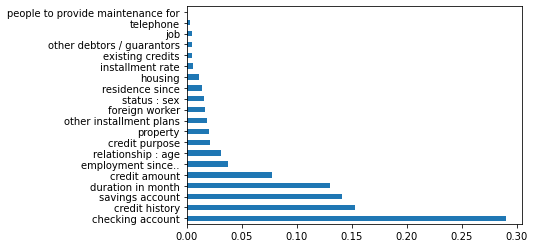

In [30]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh');

### Evaluation

In [31]:
target_names = ['Not good', 'Good']
print(classification_report(y_test, rfc.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

    Not good       1.00      0.02      0.04        45
        Good       0.70      1.00      0.83       105

    accuracy                           0.71       150
   macro avg       0.85      0.51      0.44       150
weighted avg       0.79      0.71      0.59       150



### Optimization

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
param_grid={'n_estimators': [200, 500, 1000],
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 3, 5], 
            'max_features': ['sqrt', 'log2']
            }
rscv_rfc = RandomizedSearchCV(rfc, param_grid, random_state=0)
opti = rscv_rfc.fit(X_train, y_train.values.ravel())

In [36]:
opti.best_params_

{'n_estimators': 500,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy'}

In [37]:
rscv_rfc.score(X_test, y_test)

0.76

<b>After findind the best parameter value using hyper-parameter optimization (Random SearchCV) techniques, we stop further to optimizes the model accuracy. 

## Extra Tree Classifier

In [38]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train, y_train.values.ravel())

ExtraTreesClassifier(random_state=0)

In [39]:
print(classification_report(y_test, etc.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

    Not good       0.74      0.44      0.56        45
        Good       0.80      0.93      0.86       105

    accuracy                           0.79       150
   macro avg       0.77      0.69      0.71       150
weighted avg       0.78      0.79      0.77       150



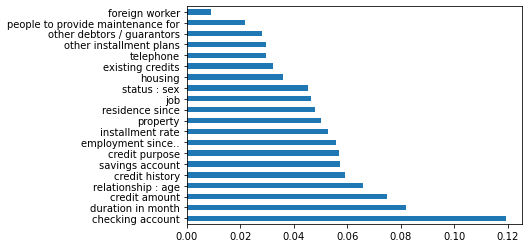

In [40]:
feat_importances_etc = pd.Series(etc.feature_importances_, index=X_train.columns)
feat_importances_etc.nlargest(20).plot(kind='barh');

### LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression(penalty='l2',
                        solver='liblinear', 
                        tol=1e-2, 
                        max_iter=200,
                        random_state=0)
lr.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=200, random_state=0, solver='liblinear', tol=0.01)

#### Evaluation

In [44]:
print(classification_report(y_test, etc.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

    Not good       0.74      0.44      0.56        45
        Good       0.80      0.93      0.86       105

    accuracy                           0.79       150
   macro avg       0.77      0.69      0.71       150
weighted avg       0.78      0.79      0.77       150

